# Методы машинного обучения в автоматизированных системах
# Рубежный контроль №1
## Калюта Н.И. ИУ5-22М
Номер варианта 6 	Номер задачи №1 6	Номер задачи №2 26
### Задача №6.
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.
### Задача №26.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.
### Для студентов групп ИУ5-22М, ИУ5И-22М.
Для произвольной колонки данных построить гистограмму.

## Импортирование необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Подключение гугл диска

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных из CSV-файла

In [5]:
df=pd.read_csv('/content/drive/MyDrive/RK/Electric.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


Считаем количество пропущенных значений (NaN) в каждой колонке

In [6]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 403
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

Вычисляем процент пропущенных значений (NaN) для каждого столбца

In [7]:
[*((c,df[c].isna().sum()/len(df[c])*100) for c in df.columns)]

[('VIN (1-10)', 0.0),
 ('County', 0.0016053168092723098),
 ('City', 0.0016053168092723098),
 ('State', 0.0),
 ('Postal Code', 0.0016053168092723098),
 ('Model Year', 0.0),
 ('Make', 0.0),
 ('Model', 0.0),
 ('Electric Vehicle Type', 0.0),
 ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', 0.0),
 ('Electric Range', 0.0),
 ('Base MSRP', 0.0),
 ('Legislative District', 0.21564755804558028),
 ('DOL Vehicle ID', 0.0),
 ('Vehicle Location', 0.0042808448247261596),
 ('Electric Utility', 0.0016053168092723098),
 ('2020 Census Tract', 0.0016053168092723098)]

# Задача 1

Заполнение пропущенных значений в столбце 'Legislative District' в DataFrame df средним значением этого столбца

In [20]:
df["Legislative District"].fillna(df["Legislative District"].mean(), inplace=True)

In [21]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


Вычисляем процент пропущенных значений (NaN) для каждого столбца

In [22]:
[*((c, df[c].isna().sum() / len(df[c]) * 100) for c in df.columns)]

[('VIN (1-10)', 0.0),
 ('County', 0.0016053168092723098),
 ('City', 0.0016053168092723098),
 ('State', 0.0),
 ('Postal Code', 0.0016053168092723098),
 ('Model Year', 0.0),
 ('Make', 0.0),
 ('Model', 0.0),
 ('Electric Vehicle Type', 0.0),
 ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', 0.0),
 ('Electric Range', 0.0),
 ('Base MSRP', 0.0),
 ('Legislative District', 0.0),
 ('DOL Vehicle ID', 0.0),
 ('Vehicle Location', 0.0042808448247261596),
 ('Electric Utility', 0.0016053168092723098),
 ('2020 Census Tract', 0.0016053168092723098)]

# Задача 26

Загрузка данных из CSV-файла

In [12]:
df = pd.read_csv("/content/drive/MyDrive/RK/Electric.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


Определение границ выбросов в DataFrame с использованием метода, основанного на стандартном отклонении.

In [13]:
from enum import Enum


class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3


def get_outlier_boundaries(df, col):
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())

    return lower_boundary, upper_boundary


Удаление выбросов из столбца "Legislative District"

In [17]:
lower_boundary, upper_boundary = get_outlier_boundaries(df, "Legislative District")
outliers_temp = np.where(
    df["Legislative District"] > upper_boundary, True, np.where(df["Legislative District"] < lower_boundary, True, False)
)
data_trimmed = df.loc[~(outliers_temp),]

In [18]:
data_trimmed

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186874,JTMEB3FVXM,Snohomish,Arlington,WA,98223.0,2021,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,10.0,167257387,POINT (-122.11597 48.194109),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
186875,7SAYGAEEXP,Snohomish,Stanwood,WA,98292.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,10.0,255471611,POINT (-122.326873 48.2144825),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
186876,3FA6P0SUXK,King,Auburn,WA,98001.0,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,30.0,326904777,POINT (-122.2651204 47.3164638),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
186877,7SAYGDEE1P,Pierce,Tacoma,WA,98422.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,252396427,POINT (-122.389973 47.291035),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


# Дополнительное задание

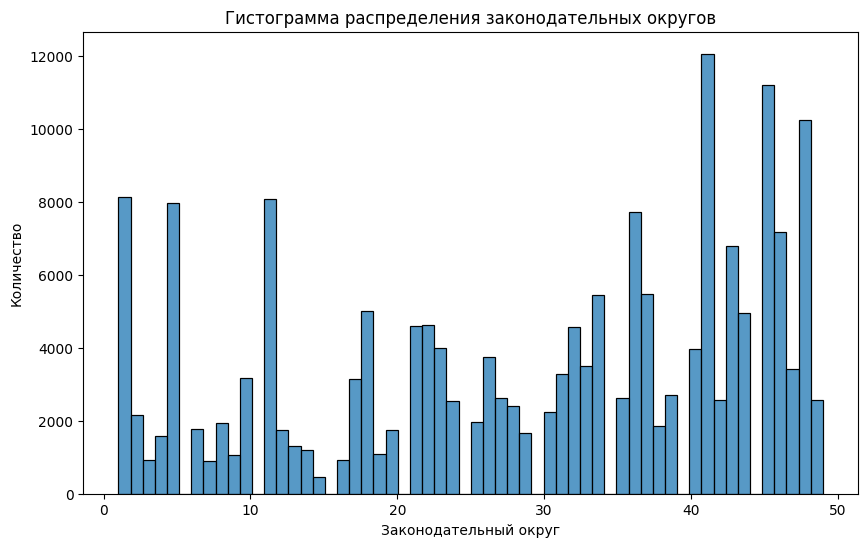

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Legislative District'], kde=False)
plt.title('Гистограмма распределения законодательных округов')
plt.xlabel('Законодательный округ')
plt.ylabel('Количество')
plt.show()